In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Heatmap on the US map
<br>
Here are the codes that make the heatmap on the given <br>
specific map image(the coordinates may vary on different map images) <br>
<br>

In [2]:
########################
##    Reading data    ##
########################

data = pd.read_pickle('total_data.pkl')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948193 entries, 0 to 61705
Data columns (total 15 columns):
BEGIN_LAT            948193 non-null float64
BEGIN_LON            948193 non-null float64
BEGIN_YEARMONTH      948193 non-null int64
STATE                948193 non-null object
INJURIES_DIRECT      948193 non-null int64
INJURIES_INDIRECT    948193 non-null int64
DEATHS_DIRECT        948193 non-null int64
DEATHS_INDIRECT      948193 non-null int64
DAMAGE_PROPERTY      688183 non-null object
EVENT_TYPE           948193 non-null object
DAMAGE_CROPS         617619 non-null object
MAGNITUDE            774587 non-null float64
MAGNITUDE_TYPE       282121 non-null object
FLOOD_CAUSE          76249 non-null object
DATE                 948193 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 115.7+ MB
None


,BEGIN_LAT,BEGIN_LON,BEGIN_YEARMONTH,STATE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,EVENT_TYPE,DAMAGE_CROPS,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,DATE
0,35.12,-99.20,195004,OKLAHOMA,0,0,0,0,250K,Tornado,0,0.0,NaN,NaN,1950-04-13
1,31.90,-98.60,195004,TEXAS,0,0,0,0,25K,Tornado,0,0.0,NaN,NaN,1950-04-22
2,40.58,-75.70,195007,PENNSYLVANIA,2,0,0,0,25K,Tornado,0,0.0,NaN,NaN,1950-07-11
3,40.60,-76.75,195007,PENNSYLVANIA,0,0,0,0,2.5K,Tornado,0,0.0,NaN,NaN,1950-07-10
4,41.63,-79.68,195007,PENNSYLVANIA,0,0,0,0,2.5K,Tornado,0,0.0,NaN,NaN,1950-07-18


In [4]:
##########################
##    Max Min Values    ##
##########################

max_lat = max(data.BEGIN_LAT)
min_lat = min(data.BEGIN_LAT)

max_lon = max(data.BEGIN_LON)
min_lon = min(data.BEGIN_LON)

print('max_lat :', max_lat)
print('min_lat :', min_lat, end='\n\n')
print('max_lon :', max_lon)
print('min_lon :', min_lon)

max_lat : 70.5029
min_lat : -14.4

max_lon : 171.3661
min_lon : -815.1


<IPython.core.display.Javascript object>


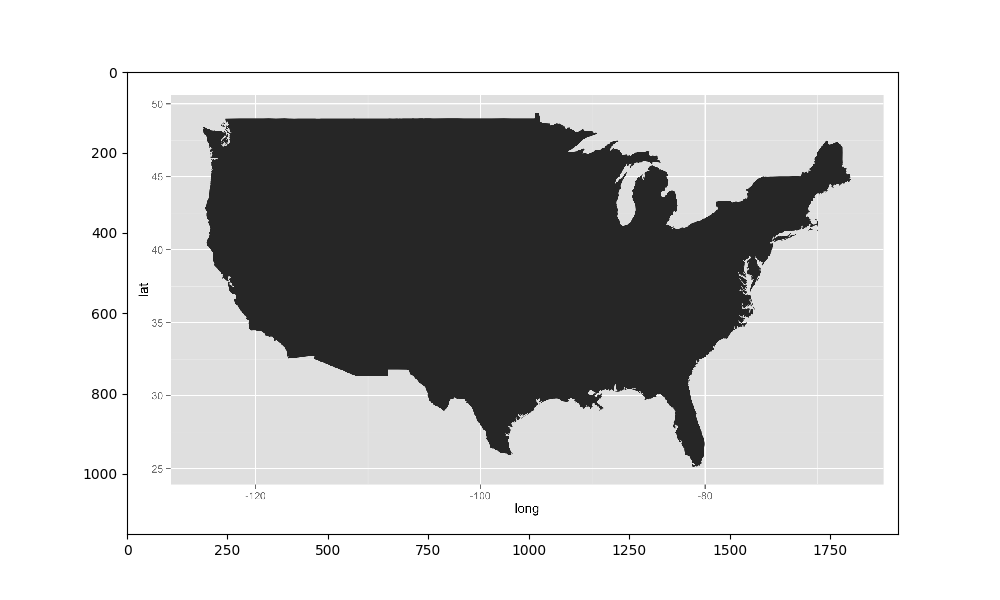

In [9]:
#################################
##    Reading the map image    ##
#################################

img = cv2.imread('usa.png')
img = img[100:1250, :, :]

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.show()

# Finding the limits
<br>
Here I found the map limits' coordinates with image pixel coordinates, <br>
it is needed for ploting the points with LAT and LON values. <br>

    .
    .   LON         1 LON degree = 28 pixels
    . max = -63
    . min = -131
    .
    .   LAT         1 LAT degree = 37 pixels
    . max = 52
    . min = 21
    .

# Heatmap
<br>
So I just plot a very small point([4 x 4] pixels) <br>
for every event that happened on the image with right coordinates. <br>
<br>
As a result we have a very detailed <br>
heatmap image that show the intensivity <br>
of the events of every area. <br>
<br>
The darker the map area, the more intensive the events. <br>
<br>

<IPython.core.display.Javascript object>


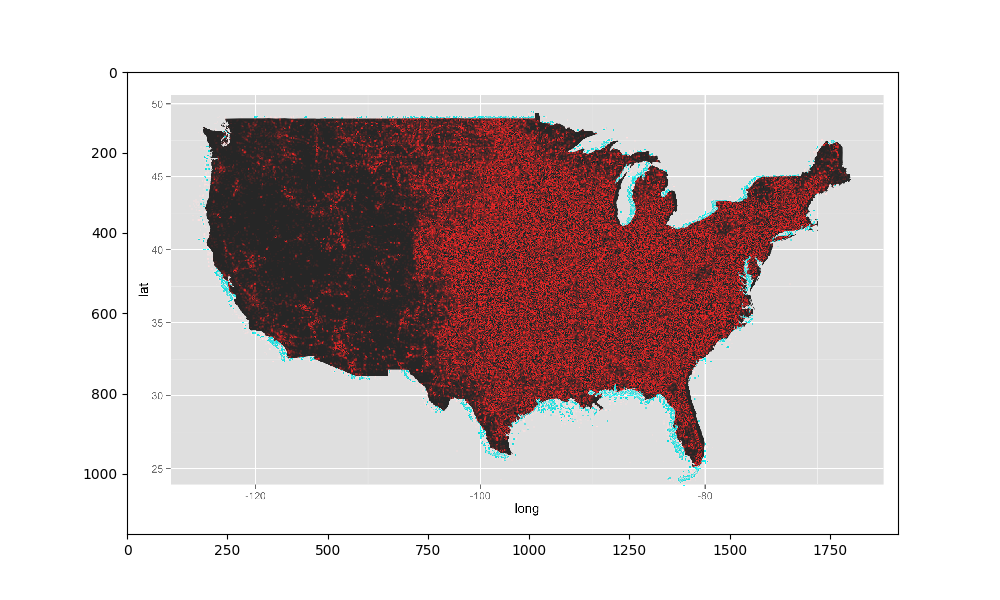

In [18]:
for lat, lon in data[['BEGIN_LAT', 'BEGIN_LON']].values:
    if lon>-131 and lon<-63 and lat>21 and lat<52:
        x, y = int((52-lat)*37), int((lon+131)*28)
        img[x-2:x+2, y-2:y+2, 0] += 10
        img[x-2:x+2, y-2:y+2, 0] %= 255

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.show()

In [19]:
####################################
##    Saving the heatmap image    ##
####################################

cv2.imwrite('heatmap.jpg', img)

True